**Information Stream for self-driving car using Yolov8 for Traffic Sign Detection and Recognition**


In [ ]:
#importing the required libraries
import os
import glob
!pip install ipython


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
#importing the image display functionality for ipython
from IPython.display import Image, display

In [ ]:
#checking for the GPU
!nvidia-smi

Sat Mar  4 16:41:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            On   | 00000000:00:1E.0 Off |                    0 |
| N/A   40C    P0    27W /  70W |    130MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#print the current working directory
os.getcwd()

'/home/ubuntu/jupyter/Project'

In [ ]:
#installing the main library for using Yolov8
!pip install ultralytics==8.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.8/219.8 kB 4.2 MB/s eta 0:00:003.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 41.6 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 81.5 MB/s eta 0:00:000m eta 0:00:010:01:01
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached torchvision-0.14.1-cp38-cp38-manylinux1_x86_64.whl (24.2 MB)
  Using cached torch-1.13.1-cp38-cp38-manylinux1_x86_64.whl (887.4 MB)
  Using cached requests-2.28.2-py3-none-any.whl (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 12.6 MB/s eta 0:00:00
  Using cached pandas-1.5.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 32.7 MB/s eta 0:00:00
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
  Using cached numpy-1.24.2-cp38-cp

In [ ]:
#preliminary check to see if the ultralytics is installed properly and can access the GPU or not
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.0 🚀 Python-3.8.10 torch-1.13.1+cu117 CUDA:0 (Tesla T4, 14960MiB)
Setup complete ✅ (8 CPUs, 30.9 GB RAM, 75.5/193.6 GB disk)


In [ ]:
os.getcwd()

'/home/ubuntu/jupyter/Project'

In [ ]:
#creating a datasets directory to keep all the training dataset in one location
!mkdir datasets

In [ ]:
#seeing the content of that directory
import os
os.getcwd()

'/home/ubuntu/jupyter/Project'

In [ ]:
!cd datasets

In [ ]:
!ls

Traffic-Signs2-4  demo.mp4	      local_test_1.mp4	    road-signs-2
Untitled.ipynb	  isfsdc-pro.ipynb    local_test_1_out.mp4  runs
cli.log		  isfsdc_pro_1.ipynb  local_test_2.mp4	    yolov8s.pt
datasets	  levha2-7	      local_test_2_out.mp4


In [ ]:
#we use roboflow to train our model on various datasets
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=332ad93c28f51907cdb17ae501acc88c40716a35cc632b622c3f6975d405b14b
  Stored in directory: /home/ubuntu/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
      Success

**Datasets**

In [ ]:
#first dataset with 2000 labelled images
from roboflow import Roboflow
rf = Roboflow(api_key="laV8ZXbvRbOnhCjmILYa")
project = rf.workspace("roboflow-100").project("road-signs-6ih4y")
dataset = project.version(2).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Extracting Dataset Version Zip to road-signs-2 in yolov8:: 100%|█| 4198/4198 [00


In [ ]:
#third dataset for training containing 7000+ images
from roboflow import Roboflow
rf = Roboflow(api_key="laV8ZXbvRbOnhCjmILYa")
project = rf.workspace("celikmustafa89merge").project("levha2")
dataset = project.version(7).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Extracting Dataset Version Zip to levha2-7 in yolov8:: 100%|█| 14138/14138 [00:


In [ ]:
os.getcwd()

'/home/ubuntu/jupyter/Project'

**Model Training**

In [ ]:
#training the yolov8 model on the dataset
!yolo task=detect mode=train model=yolov8s.pt data=/home/ubuntu/jupyter/Project/levha2-7/data.yaml epochs=100 imgsz=640

yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/home/ubuntu/jupyter/Project/levha2-7/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0

**Transfer Learning**

In [ ]:
#training the model again on a different dataset for better performance
!yolo task=detect mode=train model=runs/detect/train3/weights/best.pt data=/home/ubuntu/jupyter/Project/road-signs-2/data.yaml epochs=100 imgsz=640

yolo/engine/trainer: task=detect, mode=train, model=runs/detect/train3/weights/best.pt, data=/home/ubuntu/jupyter/Project/road-signs-2/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.01, momentum=0.937, weight_dec

**Results**

In [ ]:
#moving to the directory for train results
!cd runs/detect/train4

In [ ]:
#lets visualize all the results after training our model
!ls runs/detect/train4

F1_curve.png						 train_batch2.jpg
PR_curve.png						 train_batch7740.jpg
P_curve.png						 train_batch7741.jpg
R_curve.png						 train_batch7742.jpg
args.yaml						 val_batch0_labels.jpg
confusion_matrix.png					 val_batch0_pred.jpg
events.out.tfevents.1678795815.ip-172-31-13-204.22930.0  val_batch1_labels.jpg
predictions.json					 val_batch1_pred.jpg
results.csv						 val_batch2_labels.jpg
results.png						 val_batch2_pred.jpg
train_batch0.jpg					 weights
train_batch1.jpg


In [ ]:
#using the image display functionality to display all the results
from IPython.display import Image

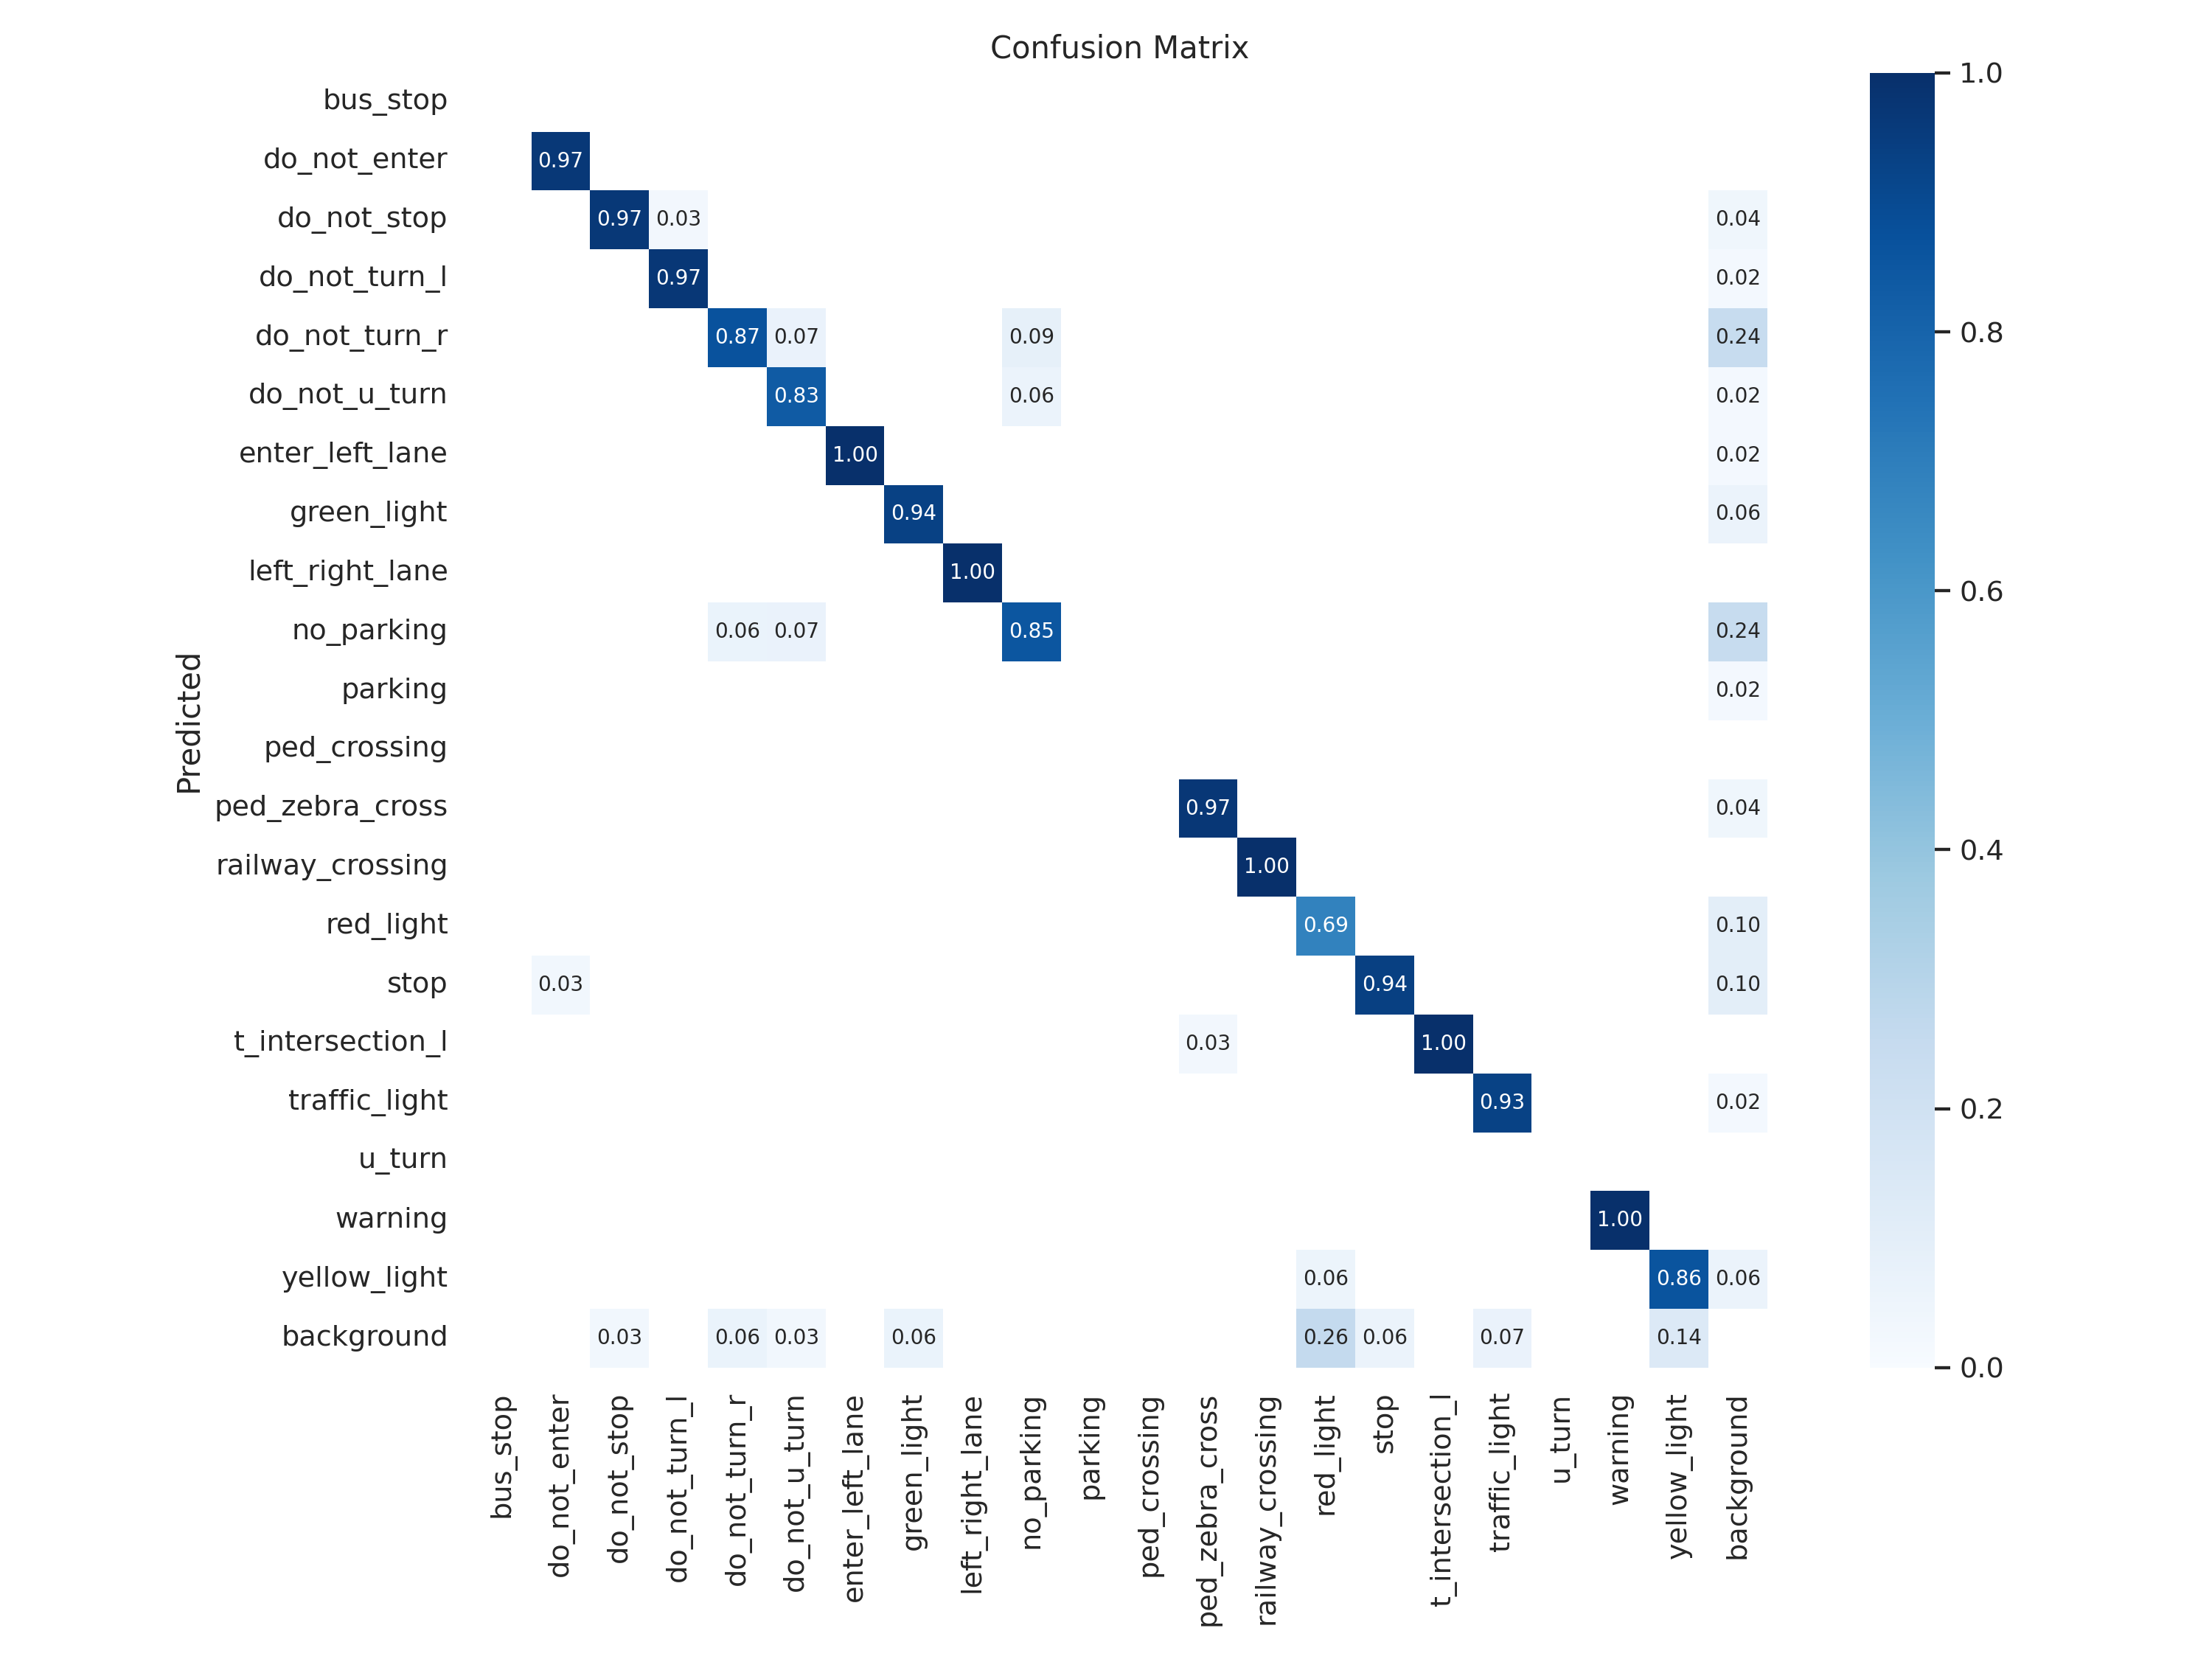

In [ ]:
#we will first see the results of the Confusion Matrix
Image(filename = "runs/detect/train4/confusion_matrix.png")

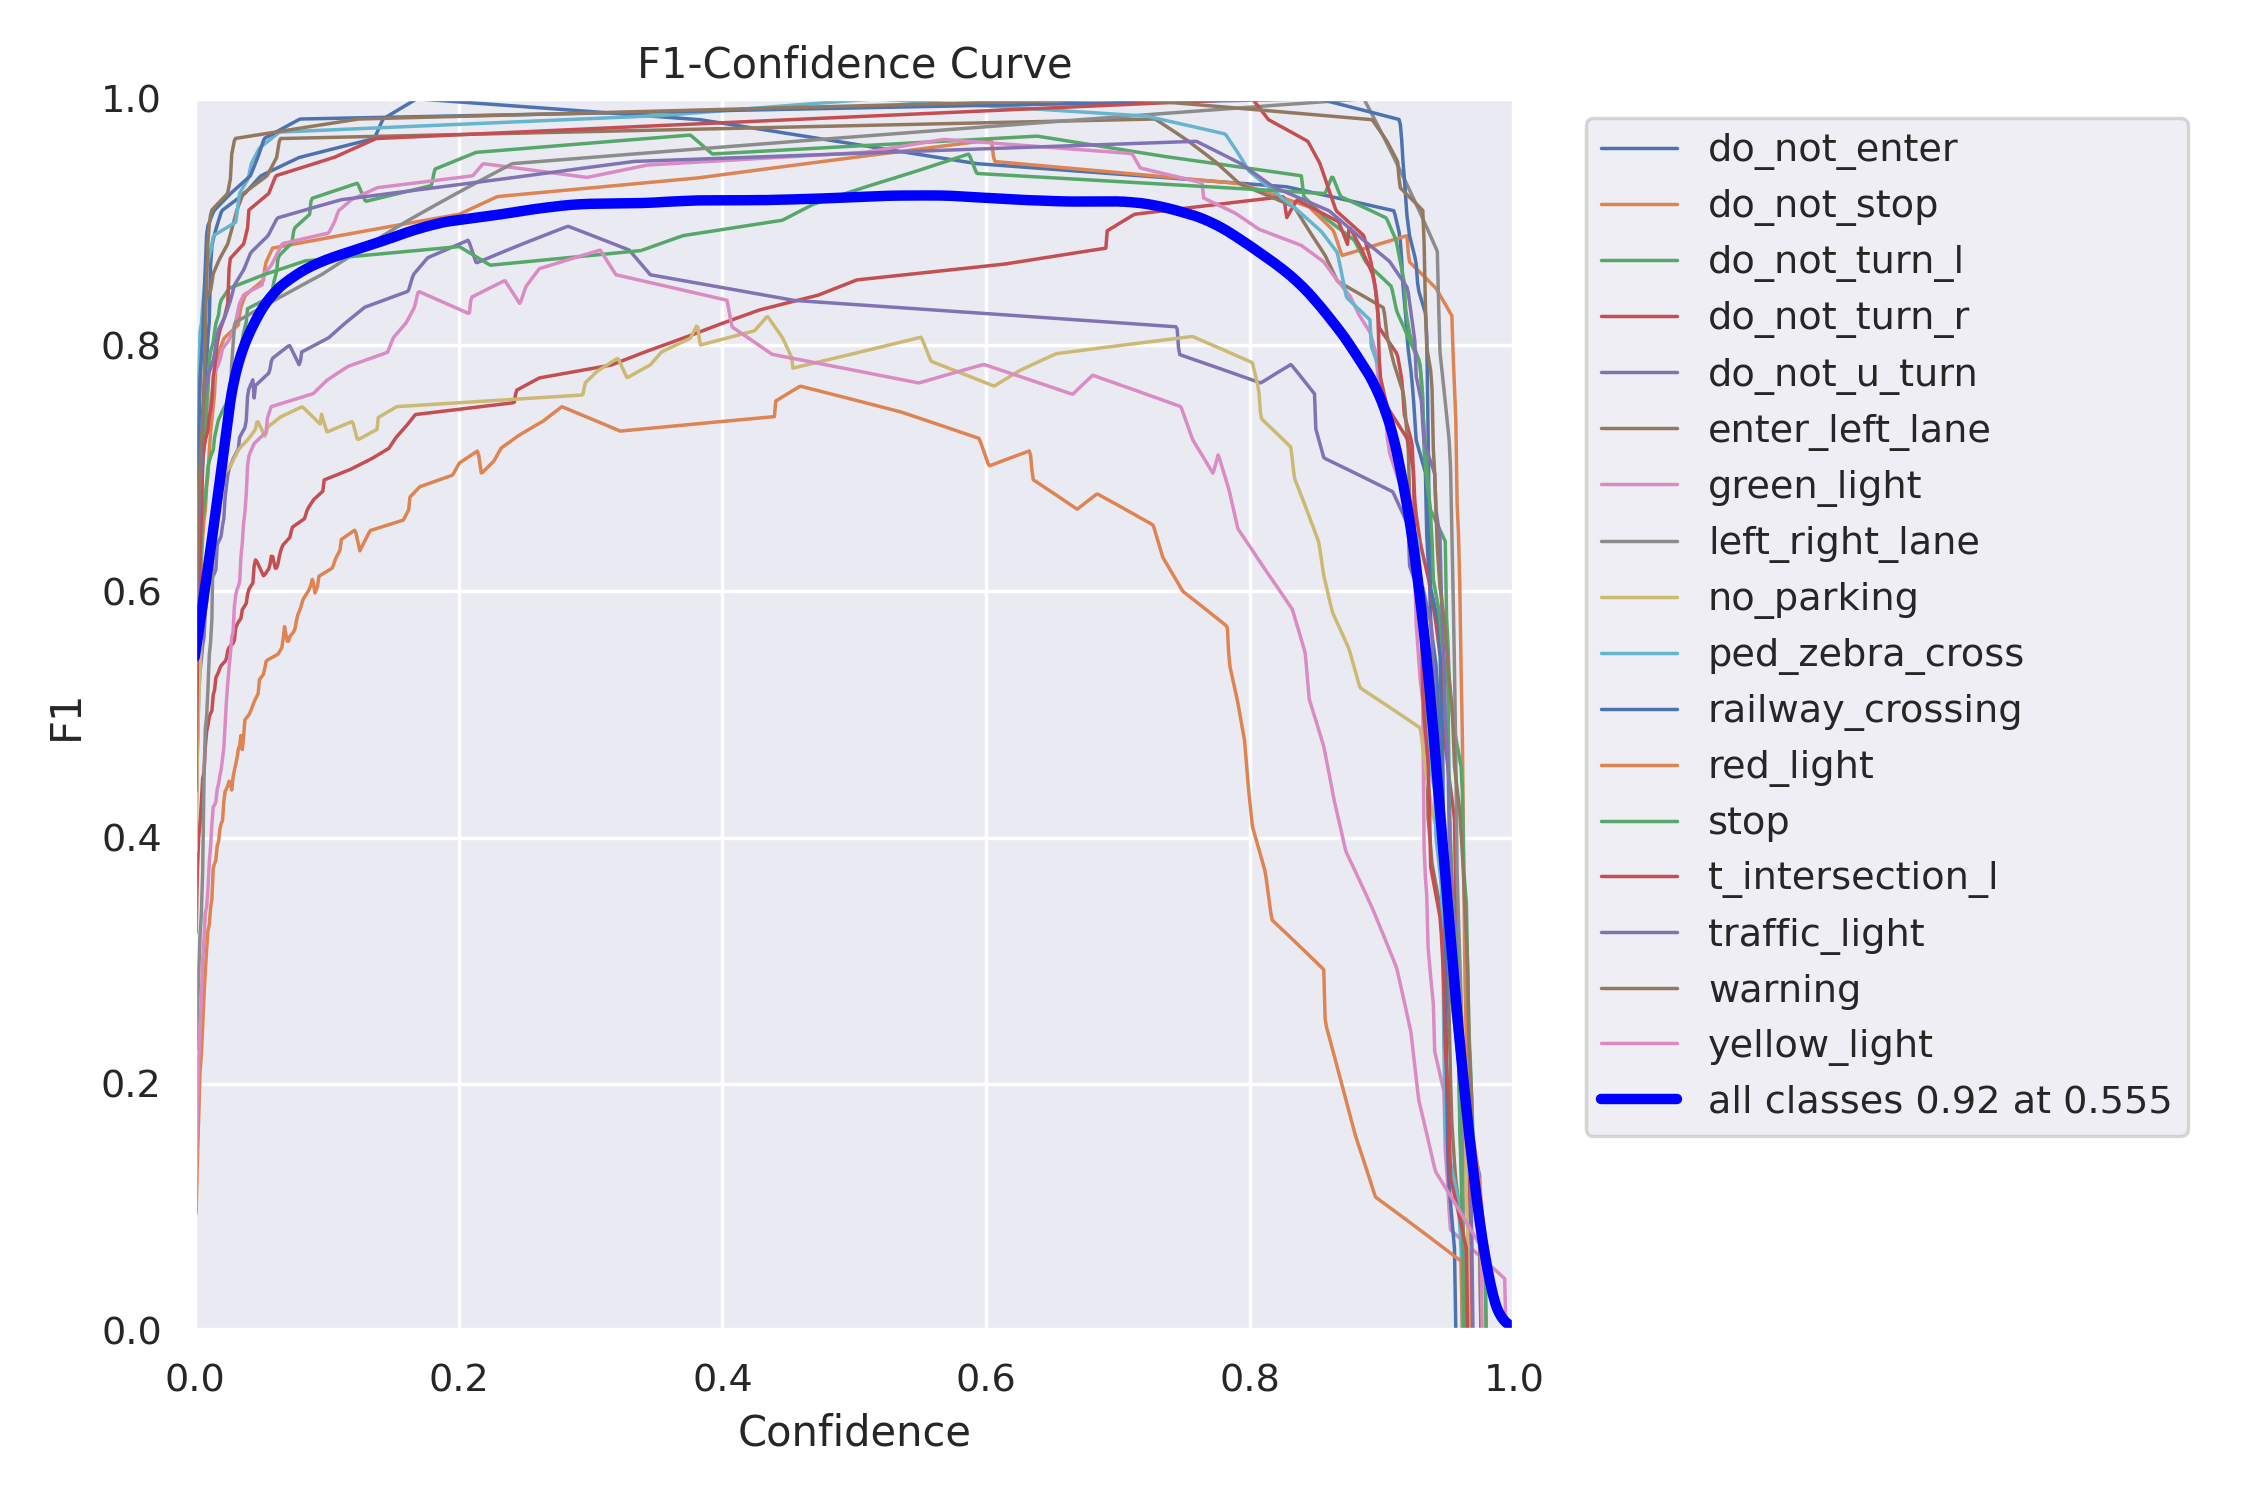

In [ ]:
#the F1-curve of the model training
Image(filename = "runs/detect/train/F1_curve.png")

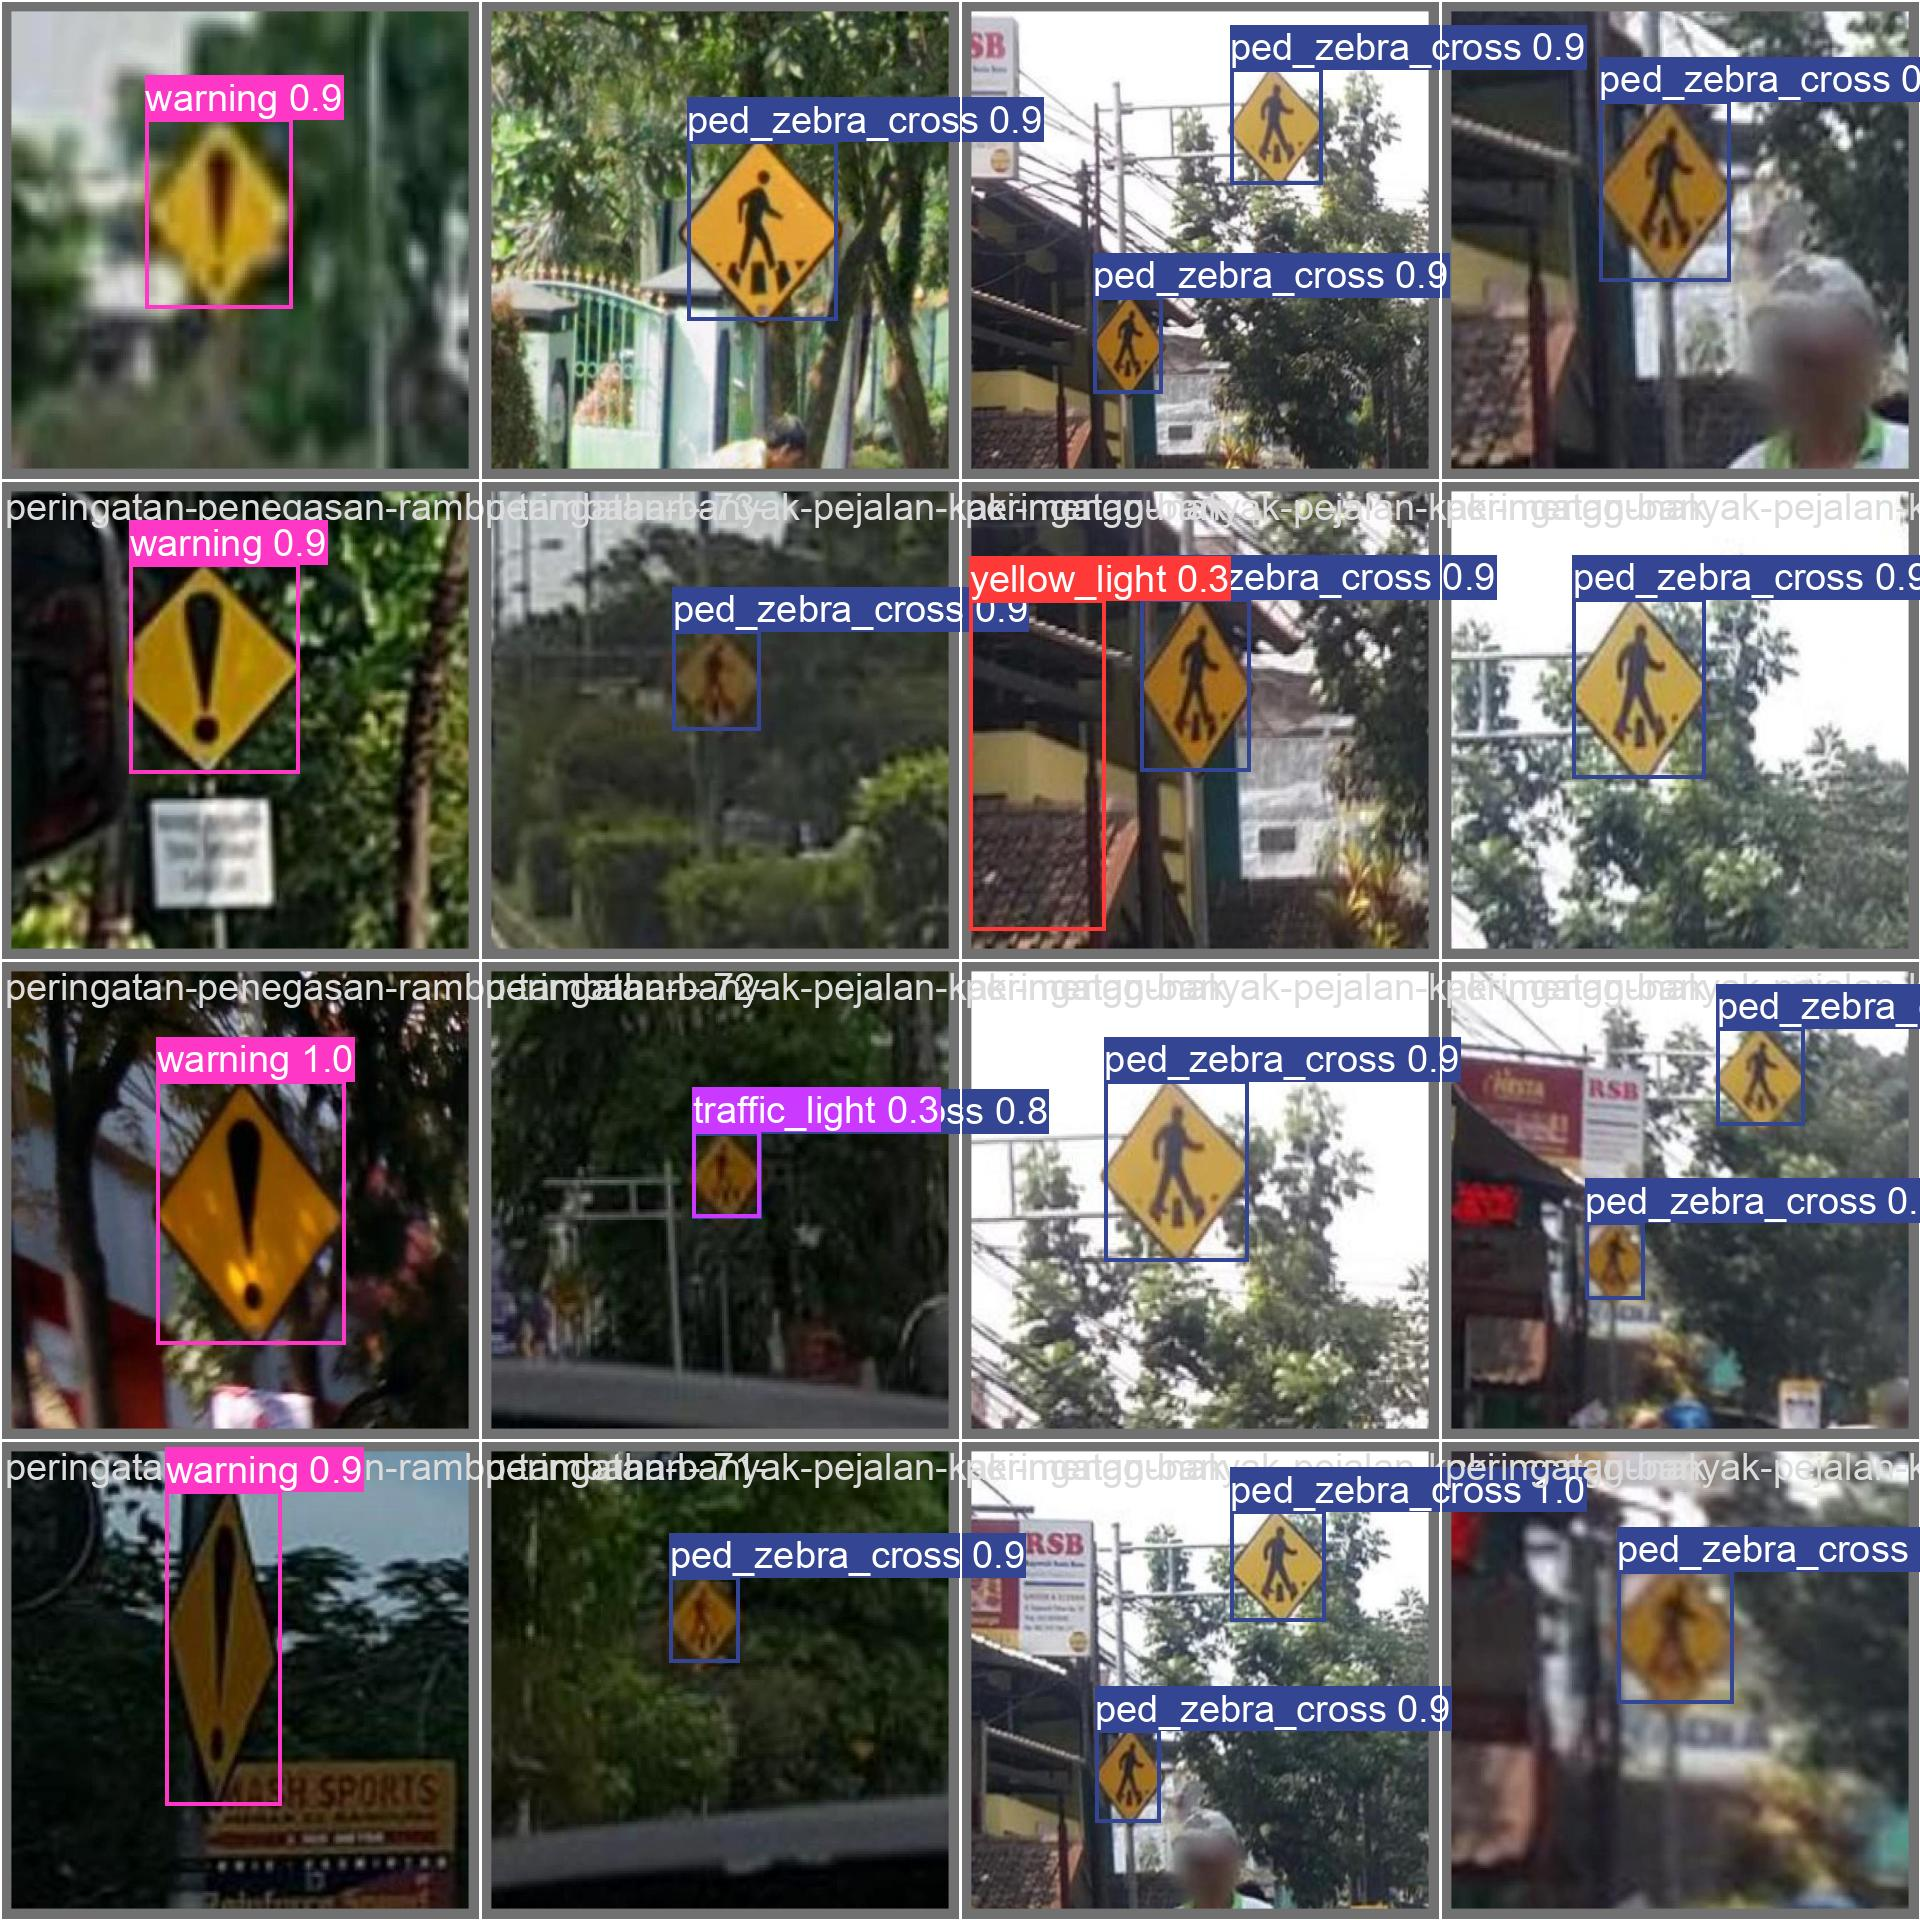

In [ ]:
#Here we are showing the results of the validation batch in the dataset
Image(filename = "runs/detect/train4/val_batch1_pred.jpg")

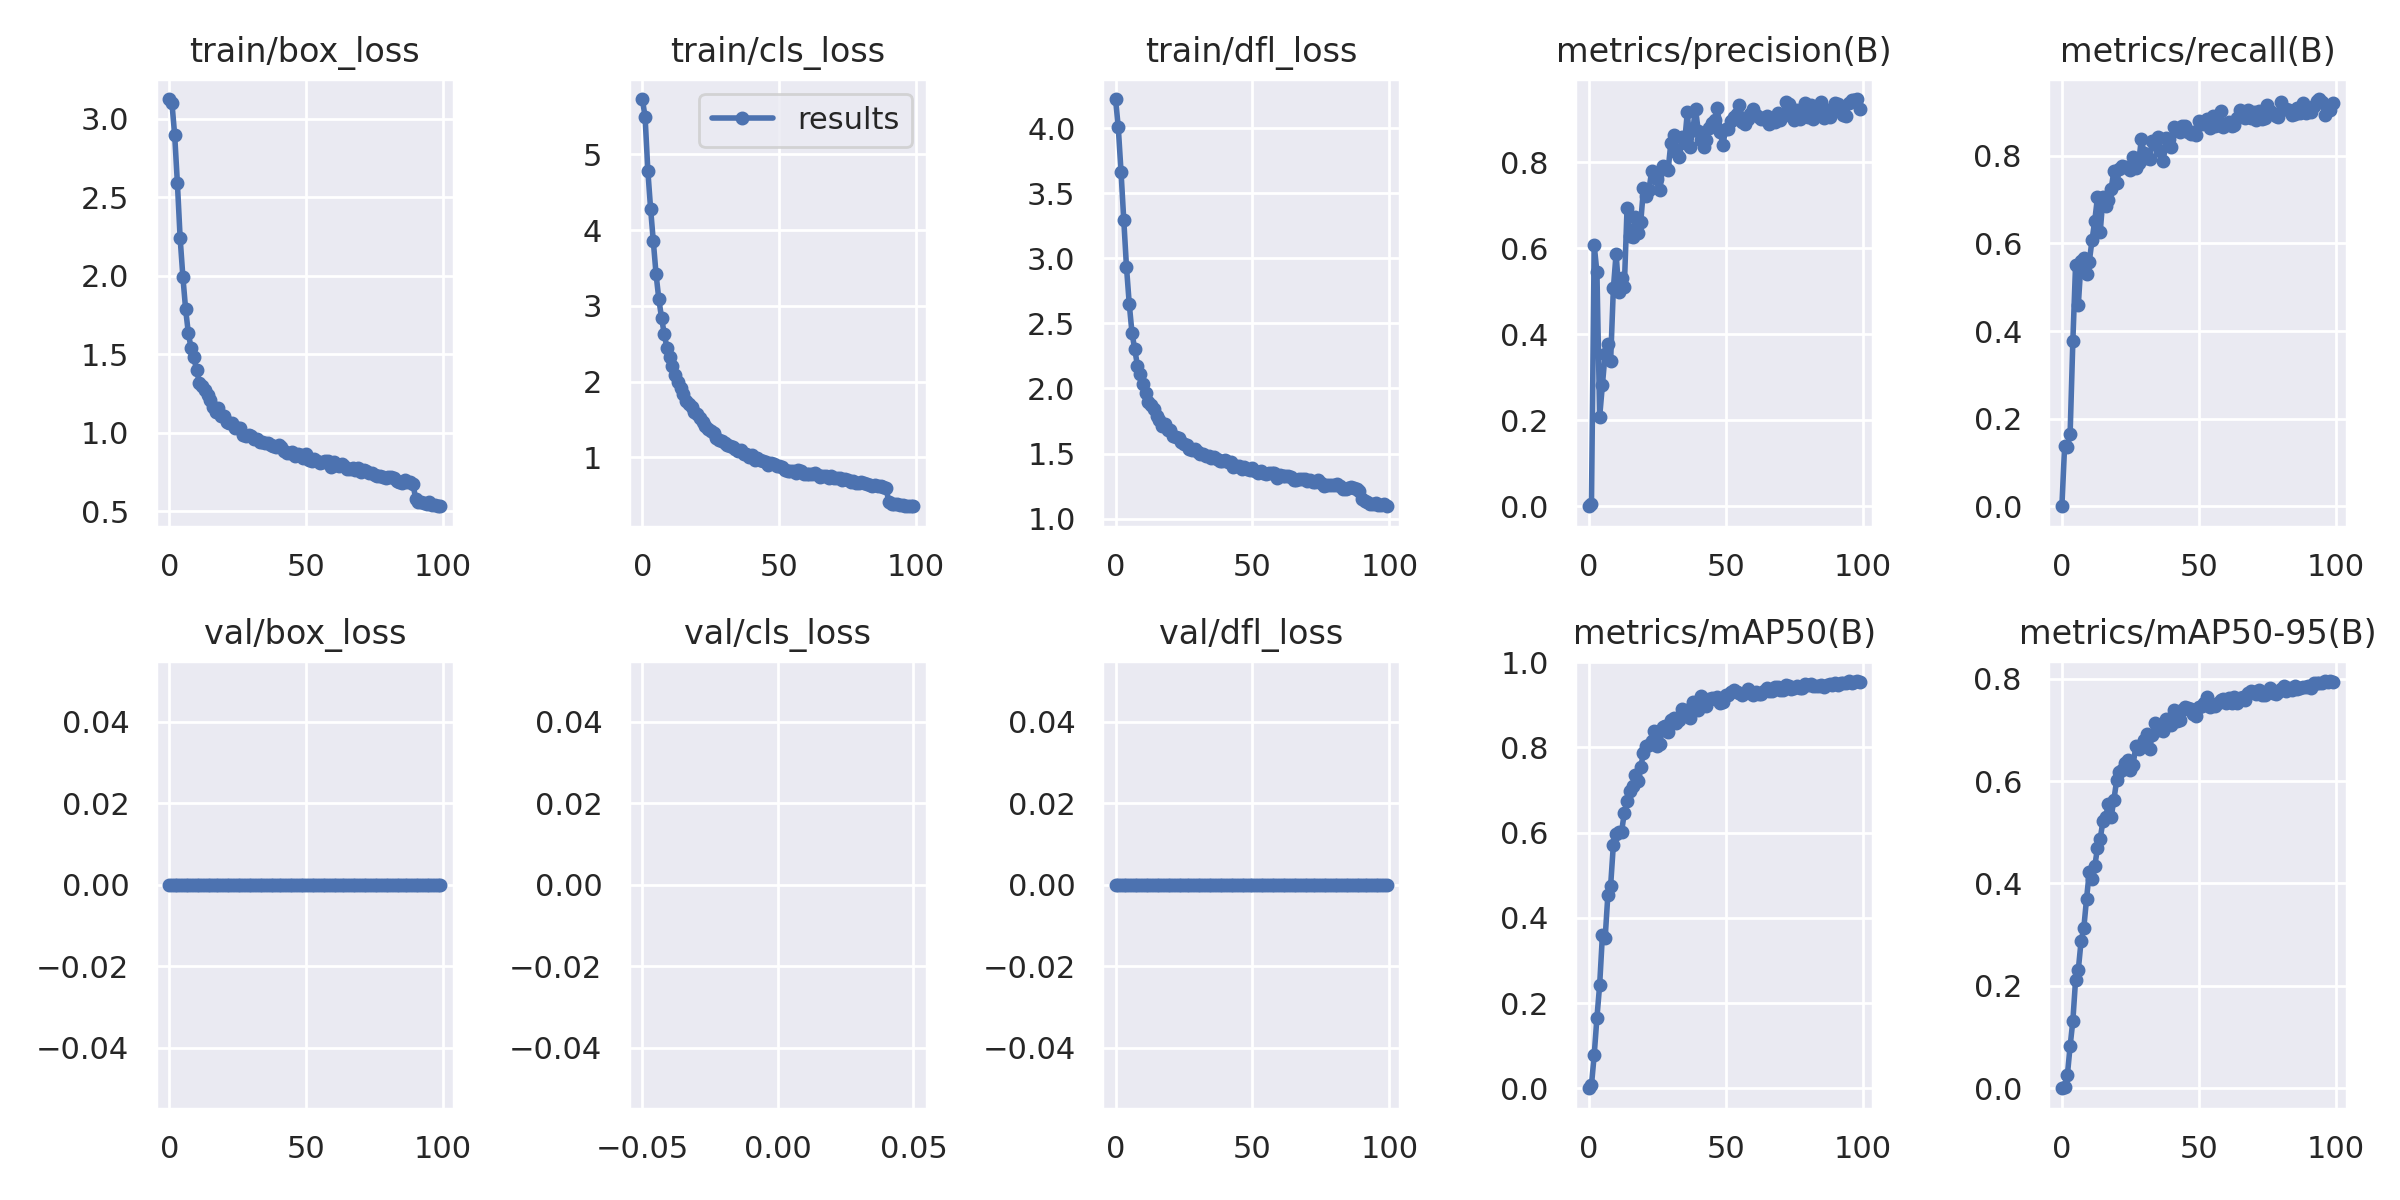

In [ ]:
#the various graphs for loss, accuracy and precision is being shown here
Image(filename = "runs/detect/train/results.png")

**Model Validation**

In [ ]:
!yolo task=detect mode=val model='runs/detect/train4/weights/best.pt' data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.0 🚀 Python-3.8.10 torch-1.13.1+cu117 CUDA:0 (Tesla T4, 14960MiB)
Fusing layers... 
Model summary: 168 layers, 11133711 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /home/ubuntu/jupyter/Project/road-signs-2/valid/labels.cache... 48
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        488        529      0.947      0.904      0.955      0.795
          do_not_enter        488         30          1      0.915      0.995      0.889
           do_not_stop        488         30      0.951      0.967      0.964      0.881
         do_not_turn_l        488         34      0.989      0.941      0.992      0.896
         do_not_turn_r        488         31      0.792      0.935      0.939      0.867
         do_not_u_turn        488         30      0.919      0.756      0.923      0.801
       enter_left_lane        488         30      0.959          1      0.975      0.849
           green_light        488     

**Testing the Model**

In [ ]:
#running the trained model
!yolo task=detect mode=predict model='runs/detect/train4/weights/best.pt' save=True conf=0.25 source='local_test_2.mp4'

Ultralytics YOLOv8.0.0 🚀 Python-3.8.10 torch-1.13.1+cu117 CUDA:0 (Tesla T4, 14960MiB)
Fusing layers... 
Model summary: 168 layers, 11133711 parameters, 0 gradients, 28.5 GFLOPs
video 1/1 (1/119) /home/ubuntu/jupyter/Project/local_test_2.mp4: 352x640 16.8ms
video 1/1 (2/119) /home/ubuntu/jupyter/Project/local_test_2.mp4: 352x640 11.1ms
video 1/1 (3/119) /home/ubuntu/jupyter/Project/local_test_2.mp4: 352x640 11.1ms
video 1/1 (4/119) /home/ubuntu/jupyter/Project/local_test_2.mp4: 352x640 11.2ms
video 1/1 (5/119) /home/ubuntu/jupyter/Project/local_test_2.mp4: 352x640 11.1ms
video 1/1 (6/119) /home/ubuntu/jupyter/Project/local_test_2.mp4: 352x640 11.1ms
video 1/1 (7/119) /home/ubuntu/jupyter/Project/local_test_2.mp4: 352x640 11.1ms
video 1/1 (8/119) /home/ubuntu/jupyter/Project/local_test_2.mp4: 352x640 11.9ms
video 1/1 (9/119) /home/ubuntu/jupyter/Project/local_test_2.mp4: 352x640 11.1ms
video 1/1 (10/119) /home/ubuntu/jupyter/Project/local_test_2.mp4: 352x640 11.1ms
video 1/1 (11/119) /ho

**Output**

In [ ]:
#displaying the result of the video input
from IPython.display import HTML
from base64 import b64encode
import os

out_path = 'local_test_2_out_db.mp4'

save_path = 'runs/detect/predict8/local_test_2.mp4'


In [ ]:
#encoding the video in proper format to be able to show it in the notebook
os.system(f'ffmpeg -i {save_path} -vcodec libx264 -f mp4 {out_path}')

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

0

In [ ]:
#show the video
mp4 = open(out_path, 'rb').read()
data_url = "data:video/mp4;base64, " + b64encode(mp4).decode()

HTML("""
<video width=400 controls>
  <source src='%s' type='video/mp4'>
  </video>
  """ % data_url)